Rubber Ball Experiment

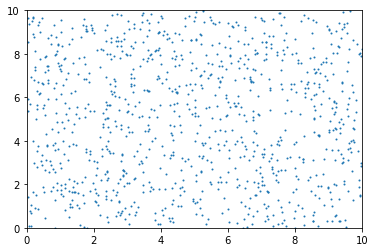

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Constants
n_balls = 1000
box_size = 10
time_steps = 200

# Initialize positions and velocities
positions = np.random.rand(n_balls, 2) * box_size
velocities = (np.random.rand(n_balls, 2) - 0.5) * 0.1

# Target positions for the final message formation
target_positions = np.random.rand(n_balls, 2) * box_size  # This would be where the text is formed

def update_positions(positions, velocities, box_size):
    positions += velocities
    # Reflect off the walls
    velocities[positions < 0] *= -1
    velocities[positions > box_size] *= -1
    positions = np.clip(positions, 0, box_size)
    return positions, velocities

def animate(i):
    global positions, velocities
    positions, velocities = update_positions(positions, velocities, box_size)
    # Gradually move particles to target positions
    if i > time_steps // 2:
        alpha = (i - time_steps // 2) / (time_steps // 2)
        positions = (1 - alpha) * positions + alpha * target_positions
    scat.set_offsets(positions)
    return scat,

fig, ax = plt.subplots()
scat = ax.scatter(positions[:, 0], positions[:, 1], s=1)
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)

ani = animation.FuncAnimation(fig, animate, frames=time_steps, interval=50, blit=True)

plt.show()


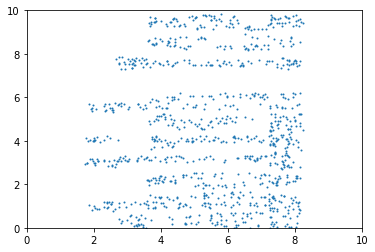

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import PillowWriter

# Constants
n_balls = 1000
box_size = 10
time_steps = 200

# Initialize positions and velocities
positions = np.random.rand(n_balls, 2) * box_size
velocities = (np.random.rand(n_balls, 2) - 0.5) * 0.1

# Generate target positions for the text "Abolish Ice"
def generate_target_positions(text, n_points, box_size):
    from PIL import Image, ImageDraw, ImageFont

    # Create an image with text
    font = ImageFont.load_default()
    text_size = font.getsize(text)
    img = Image.new('L', text_size, 0)
    draw = ImageDraw.Draw(img)
    draw.text((0, 0), text, 1, font=font)
    img = img.resize((box_size*100, box_size*100), Image.ANTIALIAS)
    
    # Get coordinates of text pixels
    coords = np.column_stack(np.where(np.array(img)))
    np.random.shuffle(coords)
    
    # Take only n_points coordinates
    coords = coords[:n_points]
    coords = coords / 100  # scale down to box_size
    return coords

target_positions = generate_target_positions("Abolish Ice", n_balls, box_size)

def update_positions(positions, velocities, box_size):
    positions += velocities
    # Reflect off the walls
    velocities[positions < 0] *= -1
    velocities[positions > box_size] *= -1
    positions = np.clip(positions, 0, box_size)
    return positions, velocities

def animate(i):
    global positions, velocities
    positions, velocities = update_positions(positions, velocities, box_size)
    # Gradually move particles to target positions
    if i > time_steps // 2:
        alpha = (i - time_steps // 2) / (time_steps // 2)
        positions = (1 - alpha) * positions + alpha * target_positions
    scat.set_offsets(positions)
    return scat,

fig, ax = plt.subplots()
scat = ax.scatter(positions[:, 0], positions[:, 1], s=1)
ax.set_xlim(0, box_size)
ax.set_ylim(0, box_size)

ani = animation.FuncAnimation(fig, animate, frames=time_steps, interval=50, blit=True)

# Save the animation as a GIF
ani.save("particles_animation.gif", writer=PillowWriter(fps=20))

plt.show()
